In [5]:
#Reality
import numpy as np
from src.PLS.baseSIR import no_ext_sir
from src.PLS.baseSIR import real_sir
from src.PLS.baseSIR import real_sir_times
from src.PLS.baseSIR import timed_sir
from decimal import Decimal, ROUND_UP
import time
from src.PLS.ABC import ABC_core
from src.PLS.ABC import sum_sqrt_sq_distance
import os
from matplotlib import pyplot as plt
from matplotlib.lines import Line2D

distance_measure_array = ["sum_sq","sum_sqrt_sq","mixed","rinf"]
dis = distance_measure_array[1]

seed = 1

X0 = [999,1,0]

gamma = 1
beta = 3
mu = 0
tstep = 0.05
test_time = 100
rng = np.random.default_rng(seed)
tmax = float(Decimal(tstep) * (Decimal(timed_sir(X0, mu, beta, gamma, test_time, rng) )/ Decimal(tstep)).quantize(1,rounding=ROUND_UP))
rng = np.random.default_rng(seed)
start_time = time.time()
reality_1 = no_ext_sir(X0, mu, beta, gamma, tmax, tstep, rng)
print(f"Reality took {time.time() - start_time} seconds to run!")

Reality took 0.04512739181518555 seconds to run!


C:\Users\ollie\AppData\Local\Temp\ipykernel_15004\4261729096.py:24: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


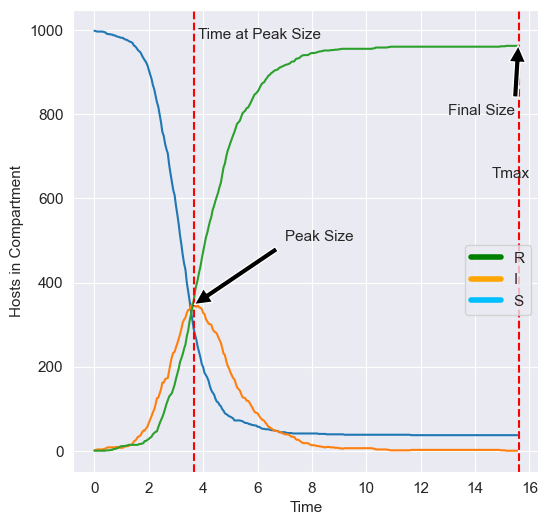

In [38]:
fig, ax0 = plt.subplots(figsize = (6,6))
font = {'size': 11}
# using rc function
plt.rc('font', **font)
run_times = np.arange(0,tmax,tstep)
ax0.plot(run_times, np.array(reality_1))
ax0.set_xlabel("Time")
ax0.set_ylabel("Hosts in Compartment")
legend_elements = [Line2D([0], [0], color='g', lw=4, label='R'),
                   Line2D([0], [0], color='orange',lw=4, label='I'),
                       Line2D([0], [0], color='deepskyblue', lw=4, label='S')]
fig.legend(handles=legend_elements, bbox_to_anchor = (0.9,0.5))

#annotate
ax0.annotate(text="Final Size", xy= (tmax,971), xytext= (13,800), arrowprops=dict(facecolor='black', shrink=0.05))

ax0.annotate(text="Peak Size", xy= (3.5,340), xytext= (7,500), arrowprops=dict(facecolor='black', shrink=0.05))

ax0.axvline(3.65, color="red", linestyle = "--")
ax0.annotate(text="Time at Peak Size", xy= (3.8,980))

ax0.axvline(tmax, color="red", linestyle = "--")
ax0.annotate(text="Tmax", xy= (tmax - 1,650))
fig.show()